Todas las gráficas (1 a 6) generadas exitosamente.


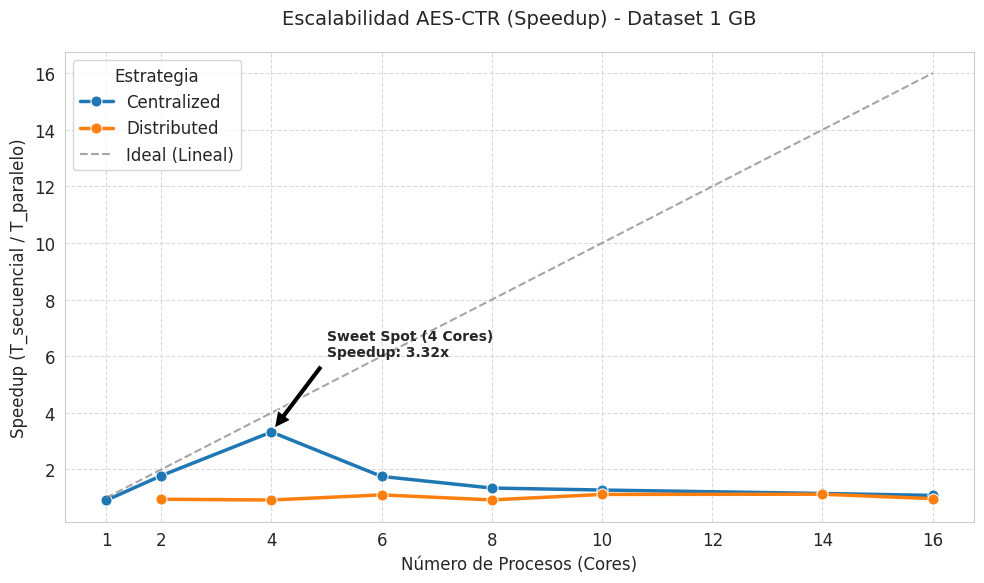

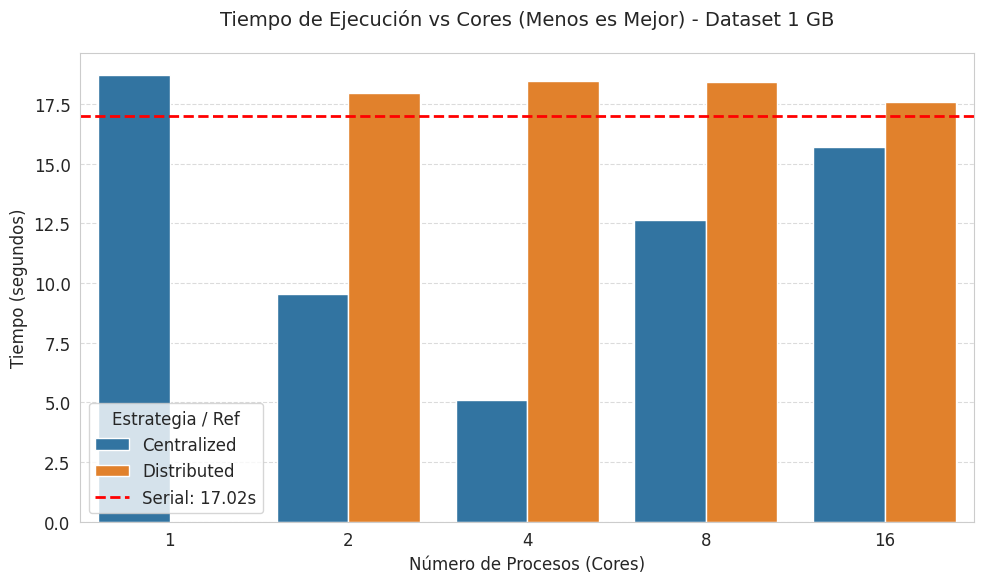

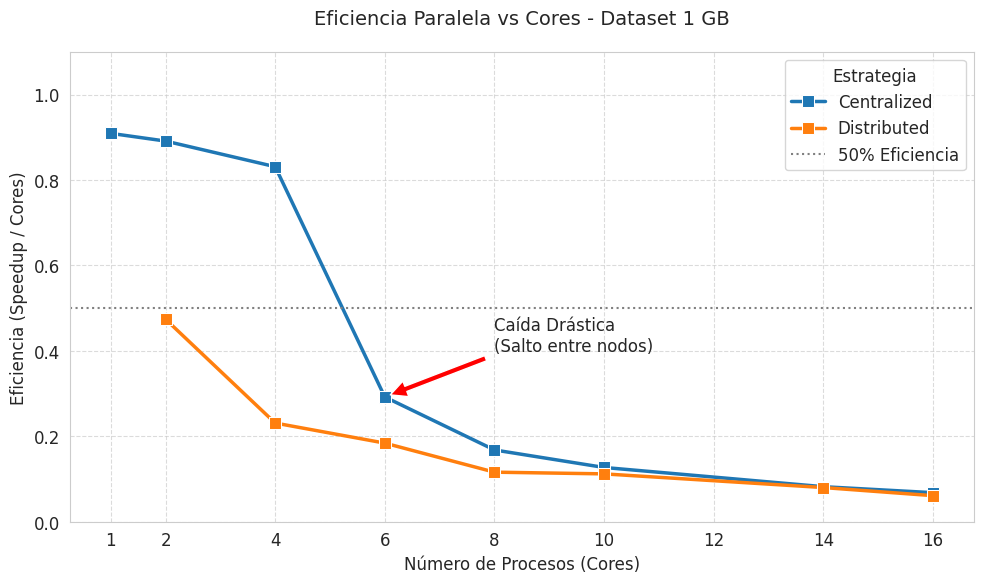

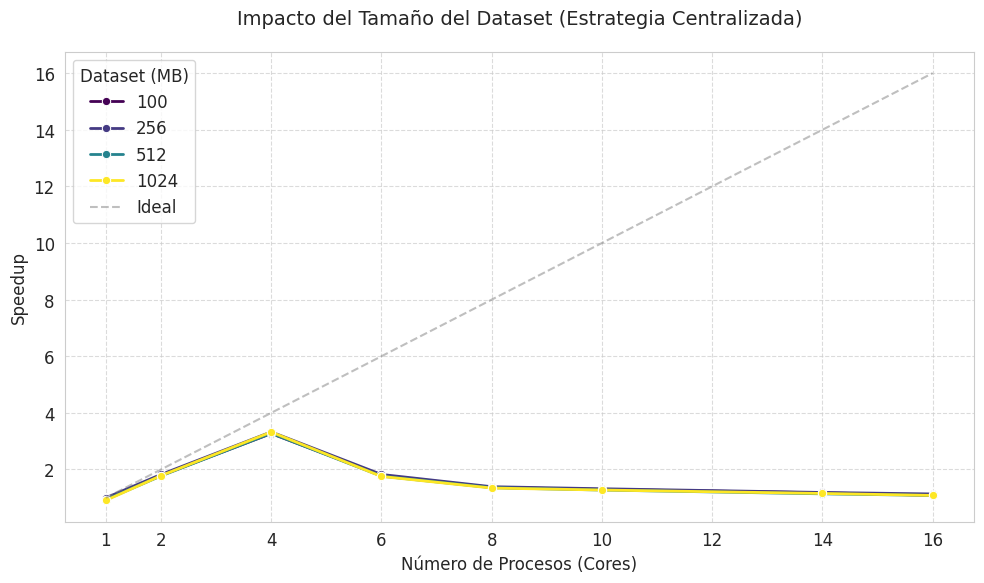

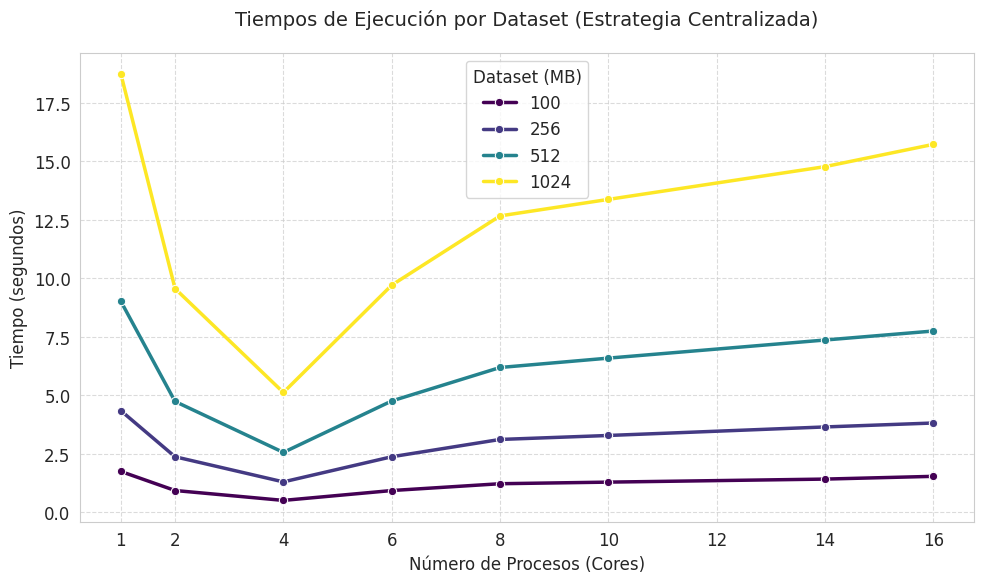

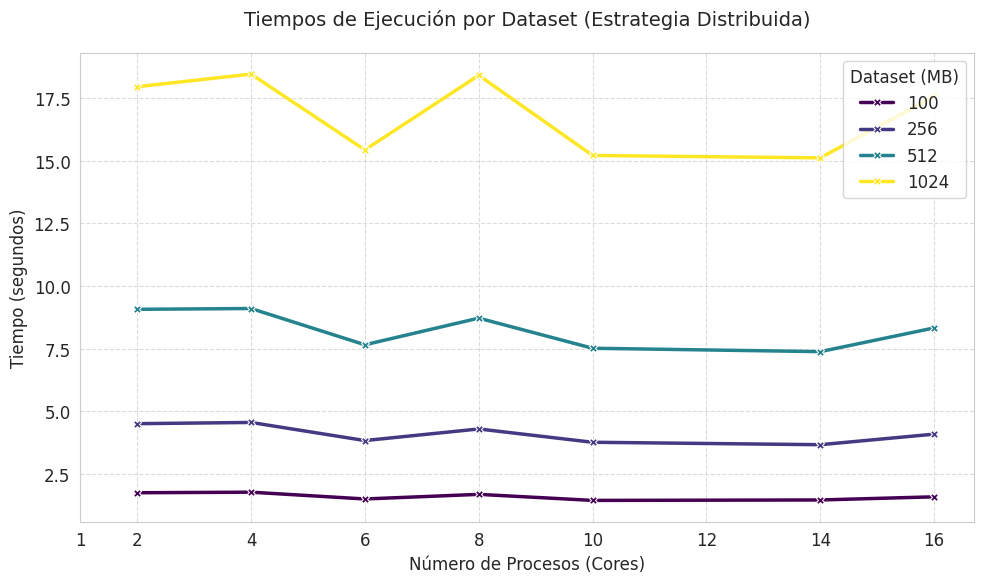

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np

# Cargar los datos proporcionados
csv_data = "./resultados.csv"

df = pd.read_csv(csv_data)

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})
colors = {"Centralized": "#1f77b4", "Distributed": "#ff7f0e"} # Azul y Naranja

# Filtrar dataset de 1024MB para las gráficas principales
df_1024 = df[df['Dataset_MB'] == 1024]

# --- GRÁFICA 1: SPEEDUP vs CORES (1024 MB) ---
plt.figure(figsize=(10, 6))
# Lineas principales
sns.lineplot(data=df_1024, x='Cores', y='Speedup', hue='Strategy',
             marker='o', markersize=8, palette=colors, linewidth=2.5)

# Linea Ideal
plt.plot([1, 16], [1, 16], '--', color='gray', label='Ideal (Lineal)', alpha=0.7)

# Anotación Sweet Spot
sweet_spot = df_1024[(df_1024['Cores'] == 4) & (df_1024['Strategy'] == 'Centralized')]
plt.annotate(f'Sweet Spot (4 Cores)\nSpeedup: {sweet_spot["Speedup"].values[0]:.2f}x',
             xy=(4, sweet_spot['Speedup'].values[0]),
             xytext=(5, 6),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, weight='bold')

plt.title('Escalabilidad AES-CTR (Speedup) - Dataset 1 GB', fontsize=14, pad=20)
plt.xlabel('Número de Procesos (Cores)', fontsize=12)
plt.ylabel('Speedup (T_secuencial / T_paralelo)', fontsize=12)
plt.xticks([1, 2, 4, 6, 8, 10, 12, 14, 16])
plt.legend(title='Estrategia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./graficas/grafica_1_speedup.png')

# --- GRÁFICA 2: TIEMPO DE EJECUCIÓN (1024 MB) ---
plt.figure(figsize=(10, 6))
sns.barplot(data=df_1024[df_1024['Cores'].isin([1, 2, 4, 8, 16])],
            x='Cores', y='Time_Parallel_s', hue='Strategy', palette=colors)

# Linea de referencia del tiempo secuencial
t_serial = df_1024['Time_Serial_s'].iloc[0]
plt.axhline(y=t_serial, color='red', linestyle='--', linewidth=2, label=f'Serial: {t_serial:.2f}s')

plt.title('Tiempo de Ejecución vs Cores (Menos es Mejor) - Dataset 1 GB', fontsize=14, pad=20)
plt.xlabel('Número de Procesos (Cores)', fontsize=12)
plt.ylabel('Tiempo (segundos)', fontsize=12)
plt.legend(title='Estrategia / Ref')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./graficas/grafica_2_tiempos.png')

# --- GRÁFICA 3: EFICIENCIA (1024 MB) ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_1024, x='Cores', y='Efficiency', hue='Strategy',
             marker='s', markersize=8, palette=colors, linewidth=2.5)

# Linea de referencia del 50%
plt.axhline(y=0.5, color='gray', linestyle=':', label='50% Eficiencia')

plt.title('Eficiencia Paralela vs Cores - Dataset 1 GB', fontsize=14, pad=20)
plt.xlabel('Número de Procesos (Cores)', fontsize=12)
plt.ylabel('Eficiencia (Speedup / Cores)', fontsize=12)
plt.xticks([1, 2, 4, 6, 8, 10, 12, 14, 16])
plt.ylim(0, 1.1)
plt.legend(title='Estrategia')
plt.grid(True, linestyle='--', alpha=0.7)

# Anotación Caída
plt.annotate('Caída Drástica\n(Salto entre nodos)',
             xy=(6, df_1024[(df_1024['Cores'] == 6) & (df_1024['Strategy'] == 'Centralized')]['Efficiency'].values[0]),
             xytext=(8, 0.4),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.tight_layout()
plt.savefig('./graficas/grafica_3_eficiencia.png')

# --- GRÁFICA 4: COMPARATIVA DATASETS (Solo Centralizado) ---
plt.figure(figsize=(10, 6))
df_centralized = df[df['Strategy'] == 'Centralized']
sns.lineplot(data=df_centralized, x='Cores', y='Speedup', hue='Dataset_MB',
             marker='o', palette='viridis', linewidth=2)

plt.plot([1, 16], [1, 16], '--', color='gray', label='Ideal', alpha=0.5)

plt.title('Impacto del Tamaño del Dataset (Estrategia Centralizada)', fontsize=14, pad=20)
plt.xlabel('Número de Procesos (Cores)', fontsize=12)
plt.ylabel('Speedup', fontsize=12)
plt.xticks([1, 2, 4, 6, 8, 10, 12, 14, 16])
plt.legend(title='Dataset (MB)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./graficas/grafica_4_datasets.png')

# --- GRÁFICA 5: COMPARATIVA TIEMPOS ABSOLUTOS (CENTRALIZADO) ---
plt.figure(figsize=(10, 6))
df_centralized = df[df['Strategy'] == 'Centralized']
sns.lineplot(data=df_centralized, x='Cores', y='Time_Parallel_s', hue='Dataset_MB',
             marker='o', palette='viridis', linewidth=2.5)

plt.title('Tiempos de Ejecución por Dataset (Estrategia Centralizada)', fontsize=14, pad=20)
plt.xlabel('Número de Procesos (Cores)', fontsize=12)
plt.ylabel('Tiempo (segundos)', fontsize=12)
plt.xticks([1, 2, 4, 6, 8, 10, 12, 14, 16])
plt.legend(title='Dataset (MB)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./graficas/grafica_5_tiempos_datasets_centralized.png')

# --- GRÁFICA 6: COMPARATIVA TIEMPOS ABSOLUTOS (DISTRIBUIDO) ---
plt.figure(figsize=(10, 6))
df_distributed = df[df['Strategy'] == 'Distributed']
sns.lineplot(data=df_distributed, x='Cores', y='Time_Parallel_s', hue='Dataset_MB',
             marker='X', palette='viridis', linewidth=2.5) # Usamos 'magma' para diferenciar visualmente

plt.title('Tiempos de Ejecución por Dataset (Estrategia Distribuida)', fontsize=14, pad=20)
plt.xlabel('Número de Procesos (Cores)', fontsize=12)
plt.ylabel('Tiempo (segundos)', fontsize=12)
plt.xticks([1, 2, 4, 6, 8, 10, 12, 14, 16])
plt.legend(title='Dataset (MB)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./graficas/grafica_6_tiempos_datasets_distributed.png')

print("Todas las gráficas (1 a 6) generadas exitosamente.")